[Notes/Bi-LSTMs (Bidirectional LSTMs) notes.pdf](<Notes/Bi-LSTMs (Bidirectional LSTMs) notes.pdf>)

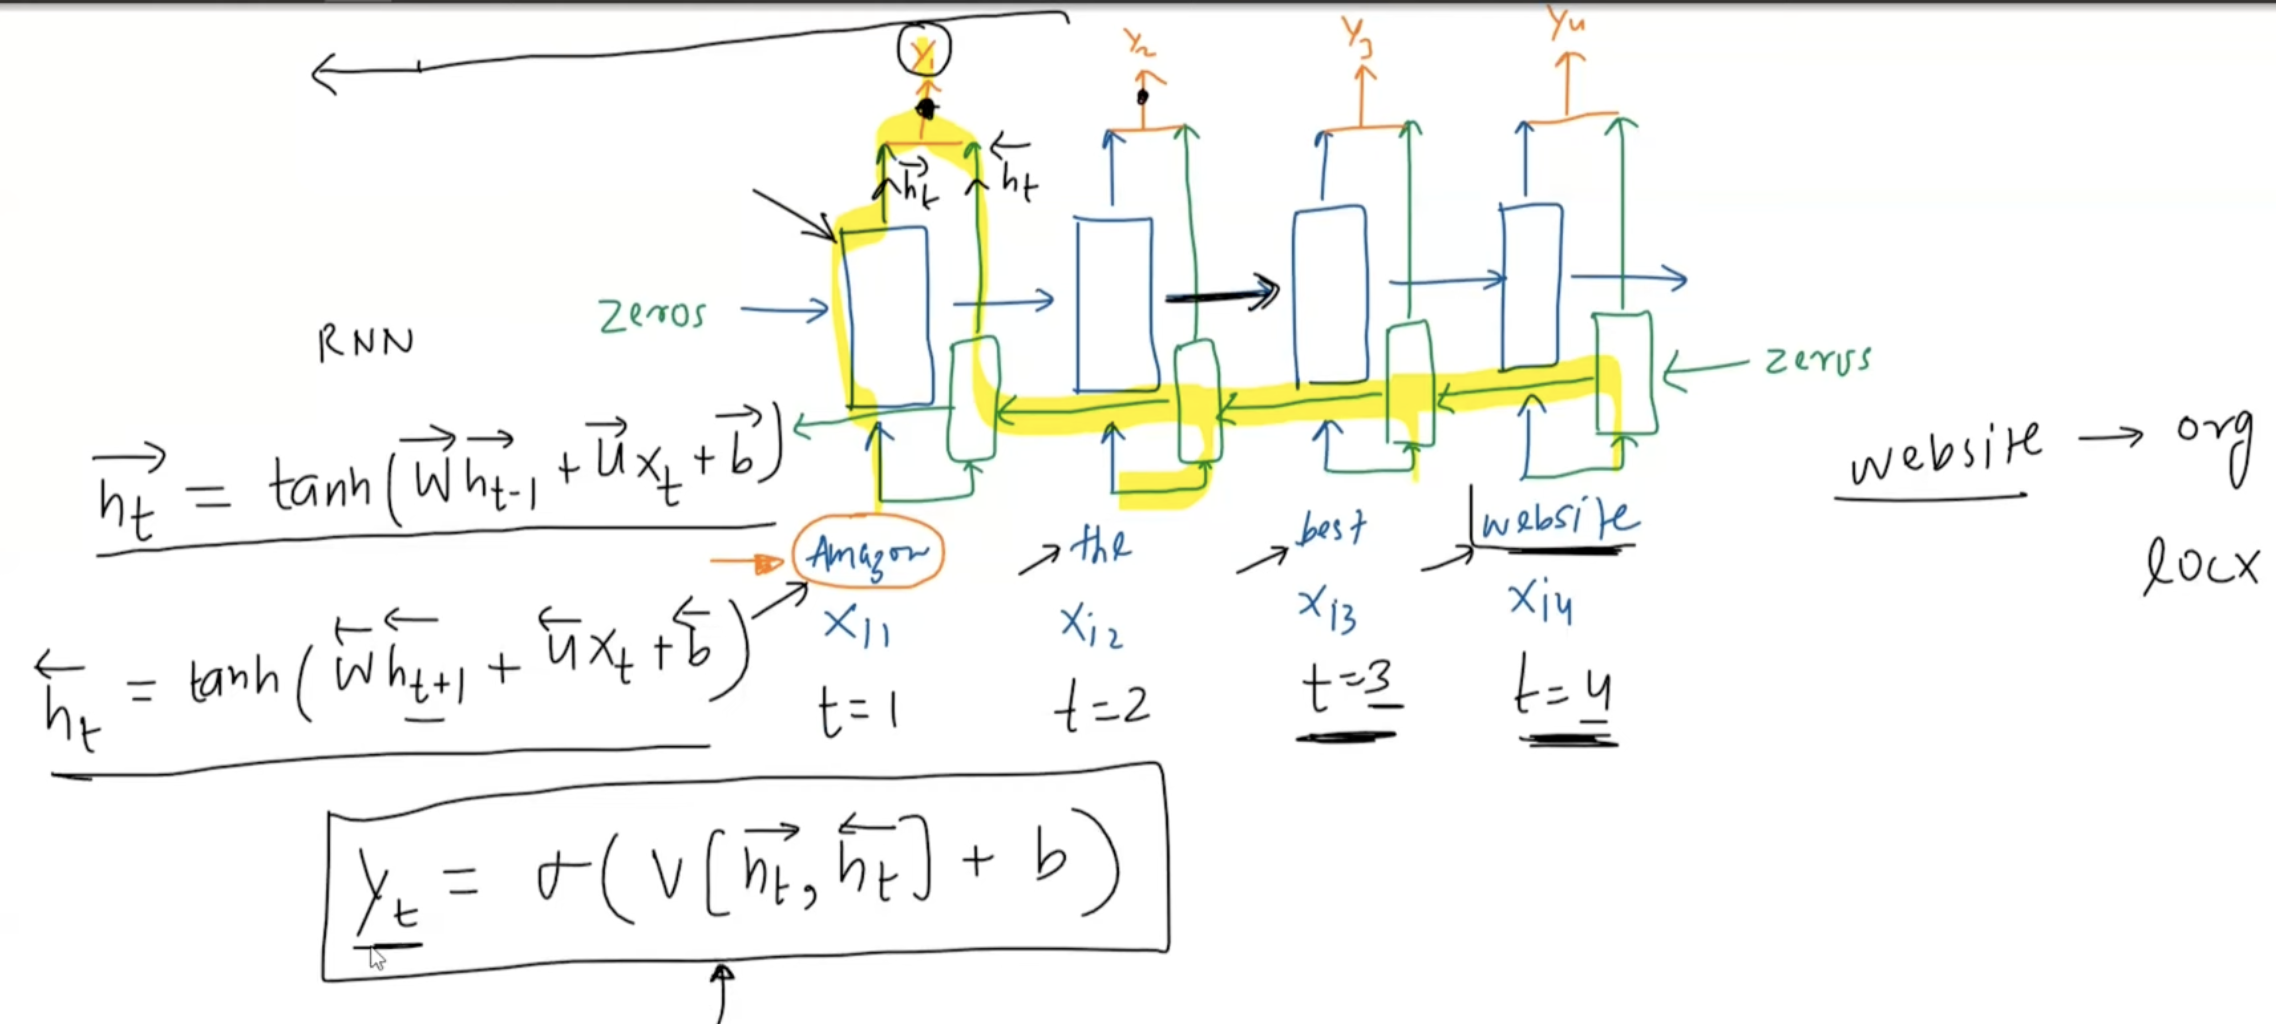

In [2]:
import torch
import torch.nn as nn

In [5]:
# BiLSTM model class definition
class BiLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super(BiLSTM, self).__init__()
        
        # Embedding layer: Converts input token IDs to dense vectors
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        # Bidirectional LSTM: Processes sequences in both directions
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        
        # Fully connected layer: Maps LSTM output to final prediction
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectionality

    def forward(self, x):
        # Get word embeddings for the input sequence
        embedded = self.embedding(x)
        
        # Pass embeddings through the LSTM
        lstm_out, _ = self.lstm(embedded)
        
        # Use output of the last timestep from LSTM for prediction
        out = self.fc(lstm_out[:, -1, :])
        
        return out

In [6]:
# Instantiate the model with specific dimensions
model = BiLSTM(input_dim=5000, embedding_dim=128, hidden_dim=64, output_dim=1)

# Print the model architecture
print(model)

BiLSTM(
  (embedding): Embedding(5000, 128)
  (lstm): LSTM(128, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)
